In [1]:
from matplotlib import pyplot as plt
import numpy
import pandas
from IPython.display import display

In [43]:
adult_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data Adult.csv")
adult_df = adult_df.set_index("Adult")
compas_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data Compas.csv")
compas_df = compas_df.set_index("Compas")
bank_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data Bank.csv")
bank_df = bank_df.set_index("Bank")
german_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data German.csv")
german_df = german_df.set_index("German")

for df in [adult_df, compas_df, bank_df, german_df]:
    df["False Positive Rate Diff"] = df["False Positive Rate - Unprivileged"] - df["False Positive Rate - Privileged"]
    df["False Negative Rate Diff"] = df["False Negative Rate - Unprivileged"] - df["False Negative Rate - Privileged"]
    df["Accuracy Diff"] = df["Accuracy - Unprivileged"] - df["Accuracy - Privileged"]
    df["False Omission Rate Diff"] = df["False Omission Rate - Unprivileged"] - df["False Omission Rate - Privileged"]
    df["False Discovery Rate Diff"] = df["False Discovery Rate - Unprivileged"] - df["False Discovery Rate - Privileged"]
    df["Statistical Parity Diff"] = df["Base Rate - Unprivileged"] - df["Base Rate - Privileged"]
    df["F1 Score Diff"] = df["F1 Score - Unprivileged"] - df["F1 Score - Privileged"]
    df.drop('Theil Index', axis=1, inplace=True)
    df.drop('Consistency', axis=1, inplace=True)

In [28]:
def num_interventions(name):
    if name == "Logistic Regression" or name  == "Meta Classifier":
        return 0
    if name.count('+') == 0:
        return 1
    if name.count('+') == 1:
        return 2
    if name.count('+') == 2:
        return 3

In [44]:
no_int = []
one_int = []
two_int = []
three_int = []
print(adult_df.index)
for row in list(adult_df.index):
    if num_interventions(row) == 0:
        no_int.append(row)
    elif num_interventions(row) == 1:
        one_int.append(row)
    elif num_interventions(row) == 2:
        two_int.append(row)
    elif num_interventions(row) == 3:
        three_int.append(row)
        
print(no_int)
print(one_int)
print(two_int)
print(three_int)
display(adult_df)

Index(['Logistic Regression', 'RW', 'DIR', 'EGR', 'GSR', 'PR', 'CEOP', 'ROC',
       'EOP', 'RW + EGR', 'RW + GSR', 'RW + PR', 'RW + CEOP', 'RW + ROC',
       'RW + EOP', 'DIR + EGR', 'DIR + GSR', 'DIR + PR', 'DIR + CEOP',
       'DIR + ROC', 'DIR + EOP', 'EGR + CEOP', 'EGR + ROC', 'EGR + EOP',
       'GSR + CEOP', 'GSR + ROC', 'GSR + EOP', 'PR + CEOP', 'PR + ROC',
       'PR + EOP', 'RW + EGR + CEOP', 'RW + EGR + ROC', 'RW + EGR + EOP',
       'RW + GSR + CEOP', 'RW + GSR + ROC', 'RW + GSR + EOP', 'RW + PR + CEOP',
       'RW + PR + ROC', 'RW + PR + EOP', 'DIR + EGR + CEOP', 'DIR + EGR + ROC',
       'DIR + EGR + EOP', 'DIR + GSR + CEOP', 'DIR + GSR + ROC',
       'DIR + GSR + EOP', 'DIR + PR + CEOP', 'DIR + PR + ROC',
       'DIR + PR + EOP'],
      dtype='object', name='Adult')
['Logistic Regression']
['RW', 'DIR', 'EGR', 'GSR', 'PR', 'CEOP', 'ROC', 'EOP']
['RW + EGR', 'RW + GSR', 'RW + PR', 'RW + CEOP', 'RW + ROC', 'RW + EOP', 'DIR + EGR', 'DIR + GSR', 'DIR + PR', 'DIR + CEOP', 'DI

,Accuracy,False Positive Rate - Unprivileged,False Positive Rate - Privileged,False Negative Rate - Unprivileged,False Negative Rate - Privileged,Accuracy - Unprivileged,Accuracy - Privileged,False Discovery Rate - Unprivileged,False Discovery Rate - Privileged,False Omission Rate - Unprivileged,...,F1 Score - Unprivileged,Base Rate - Privileged,Base Rate - Unprivileged,False Positive Rate Diff,False Negative Rate Diff,Accuracy Diff,False Omission Rate Diff,False Discovery Rate Diff,Statistical Parity Diff,F1 Score Diff
Adult,,,,,,,,,,,,,,,,,,,,,
Logistic Regression,0.8359,0.0213,0.0984,0.5404,0.4322,0.9163,0.7983,0.2531,0.2789,0.0701,...,0.5690,0.3138,0.1108,-0.0771,0.1082,0.1180,-0.1067,-0.0258,-0.203,-0.0664
RW,0.8359,0.0213,0.0984,0.5404,0.4322,0.9163,0.7983,0.2531,0.2789,0.0701,...,0.5690,0.2473,0.2473,-0.0771,0.1082,0.1180,-0.1067,-0.0258,0.000,-0.0664
DIR,0.8326,0.0305,0.1249,0.4865,0.3864,0.9147,0.7942,0.3029,0.3123,0.0642,...,0.5914,0.3138,0.1108,-0.0944,0.1001,0.1205,-0.1010,-0.0094,-0.203,-0.0572
EGR,0.8165,0.0996,0.0559,0.3019,0.5580,0.8761,0.7887,0.5108,0.2202,0.0438,...,0.5753,0.3138,0.1108,0.0437,-0.2561,0.0874,-0.1656,0.2906,-0.203,0.0111
GSR,0.7561,0.0011,0.3615,0.8327,0.1976,0.8990,0.6892,0.0440,0.5013,0.1022,...,0.2848,0.3138,0.1108,-0.3604,0.6351,0.2098,-0.0196,-0.4573,-0.203,-0.3303
PR,0.8200,0.0105,0.1178,0.6731,0.4545,0.9098,0.7779,0.1905,0.3253,0.0850,...,0.4658,0.3138,0.1108,-0.1073,0.2186,0.1319,-0.1026,-0.1348,-0.203,-0.1374
CEOP,0.8243,0.0000,0.0984,1.0000,0.4322,0.8798,0.7983,0.0000,0.2789,0.1202,...,0.0000,0.3138,0.1108,-0.0984,0.5678,0.0815,-0.0566,-0.2789,-0.203,-0.6354
ROC,0.7675,0.2480,0.2147,0.1135,0.2731,0.7681,0.7672,0.6719,0.3972,0.0202,...,0.4790,0.3138,0.1108,0.0333,-0.1596,0.0009,-0.1146,0.2747,-0.203,-0.1801
EOP,0.8103,0.0857,0.0854,0.5038,0.5035,0.8641,0.7852,0.5582,0.2774,0.0700,...,0.4674,0.3138,0.1108,0.0003,0.0003,0.0789,-0.1279,0.2808,-0.203,-0.1212


['Accuracy', 'F1 Score', 'False Positive Rate Diff', 'False Negative Rate Diff', 'Accuracy Diff', 'False Omission Rate Diff', 'False Discovery Rate Diff', 'Statistical Parity Diff', 'F1 Score Diff']


<ipython-input-65-574c104f3d9a>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(12, 8))


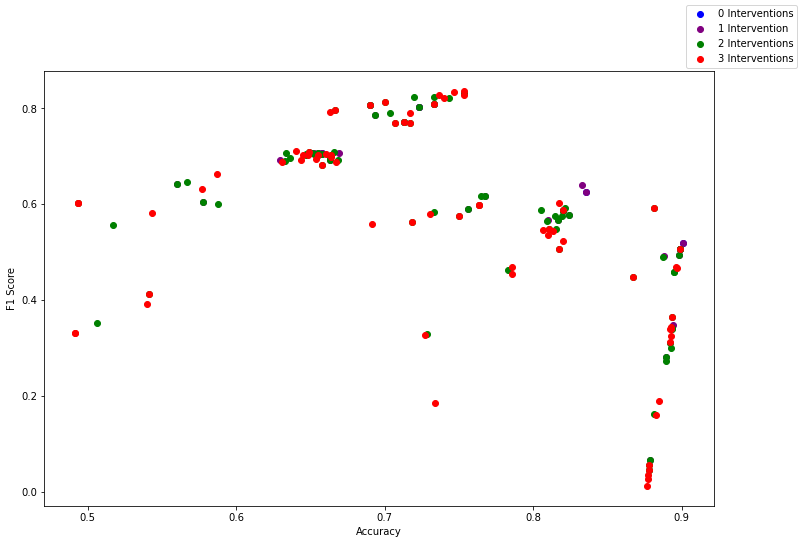

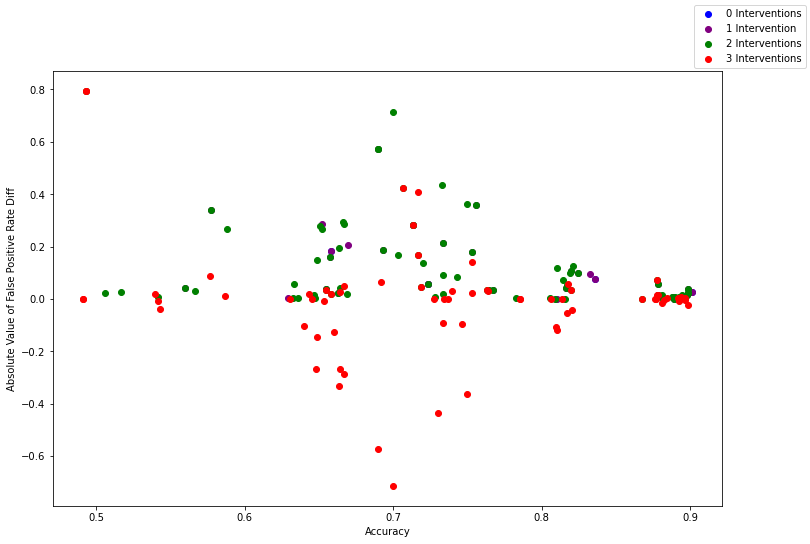

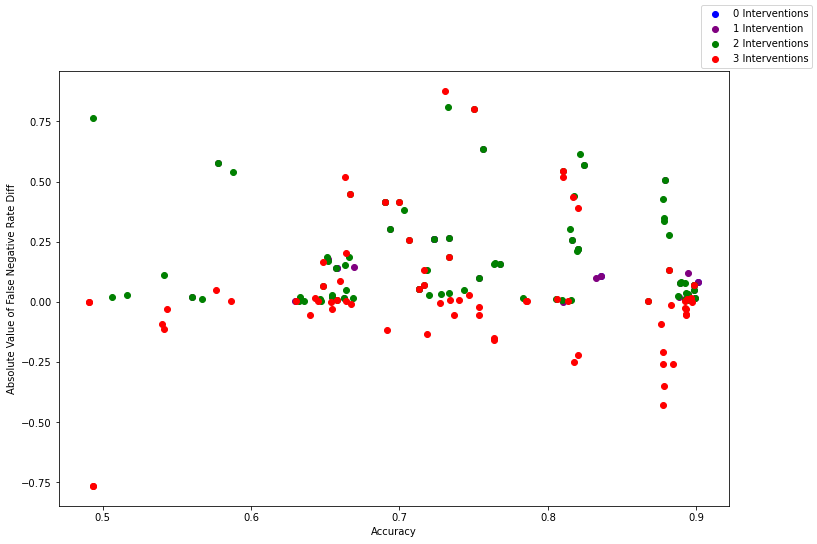

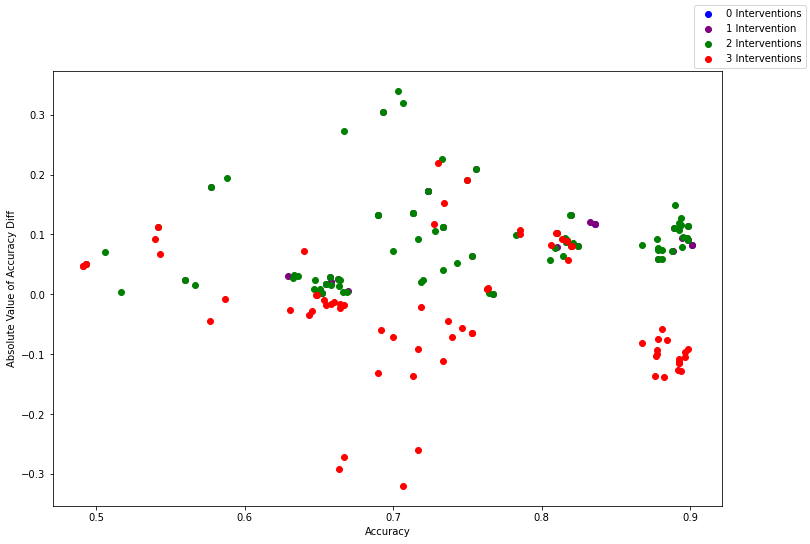

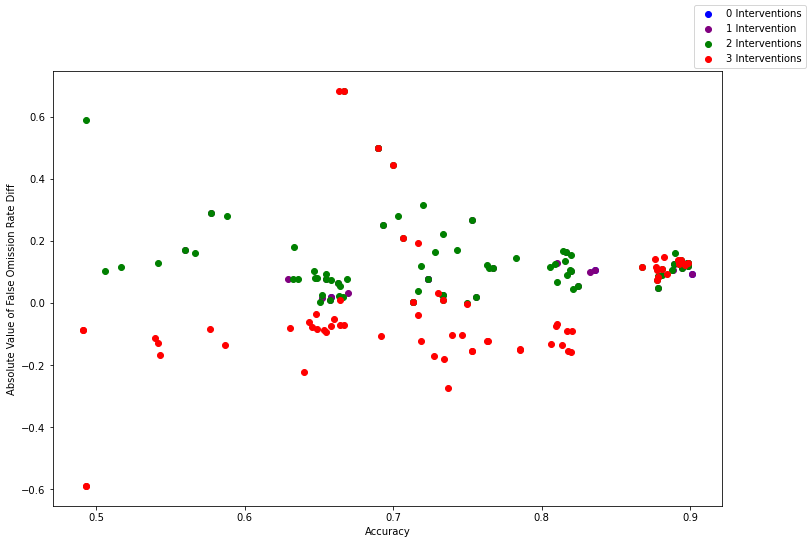

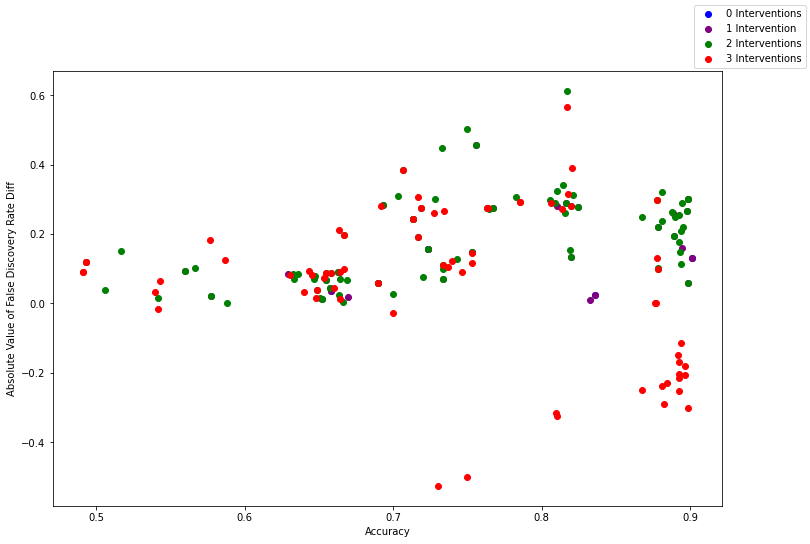

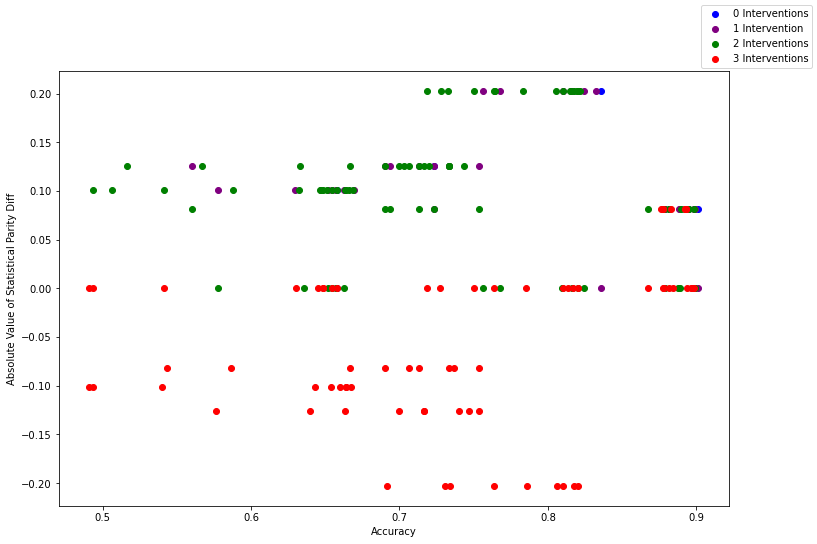

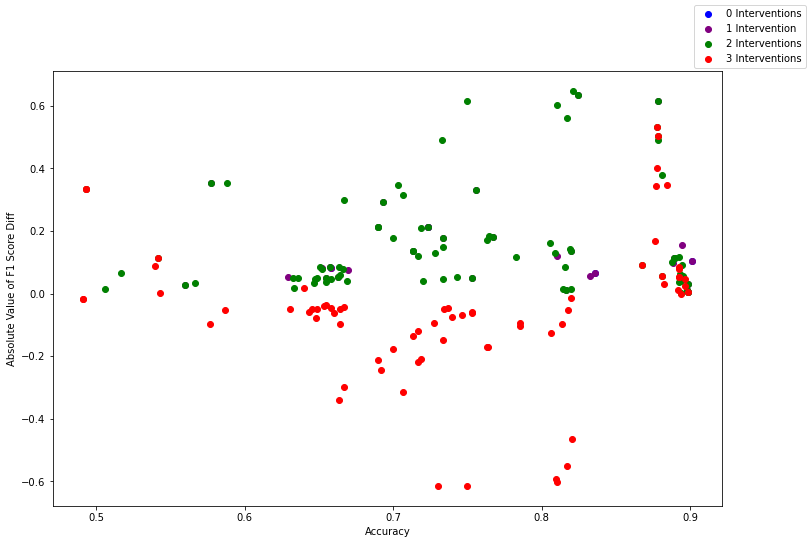

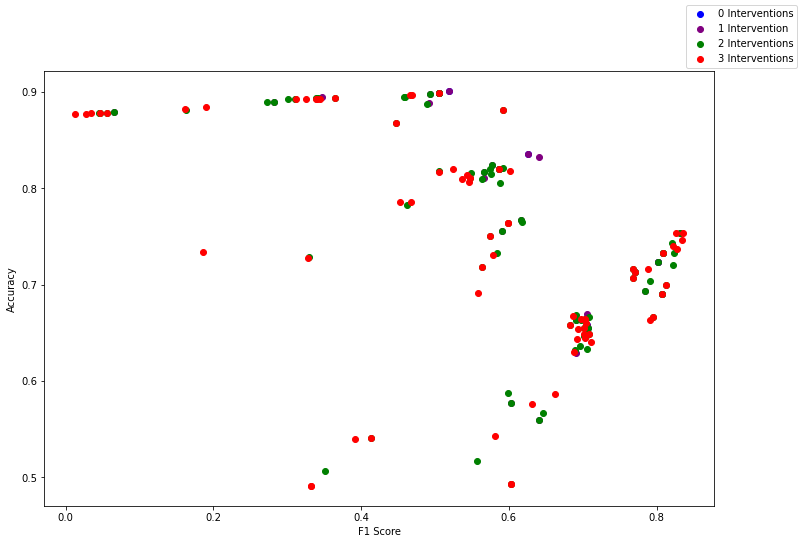

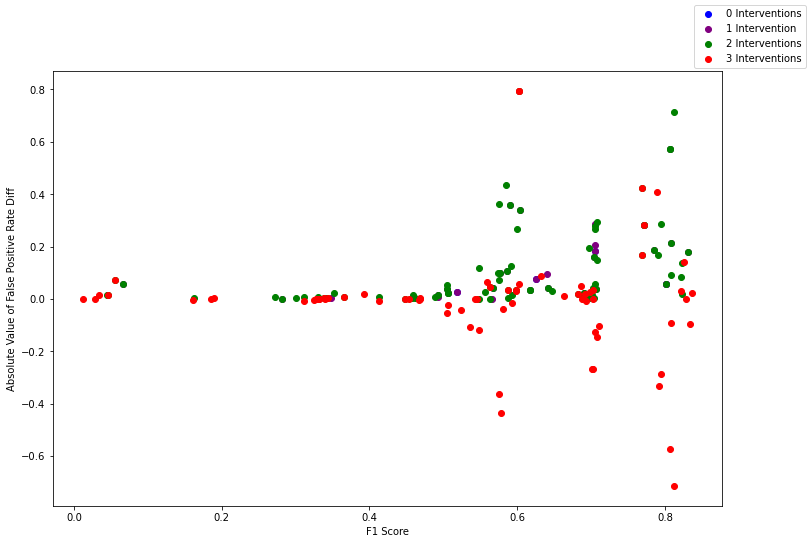

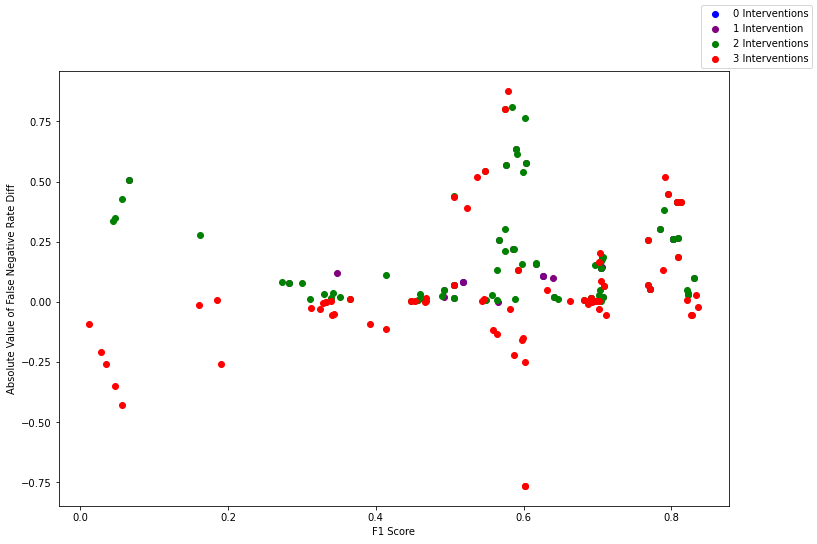

In [ ]:
def display_scatter(x, y):
    x_diff = "Diff" in x
    y_diff = "Diff" in y
    fig = plt.figure(figsize=(12, 8))
    for df, marker in zip([adult_df, compas_df, bank_df, german_df], ["," , "o" , "v" , "^"]):
        x1 = df.reindex(columns=[x], index=no_int)
        if x_diff:
            x1 = abs(x1)
        y1 = df.reindex(columns=[y], index=no_int)
        if y_diff:
            y1 = abs(y1)
        if marker == ",":
            plt.scatter(x1, y1, c ="blue", label="0 Interventions")
        else:
            plt.scatter(x1, y1, c ="blue",)
    
    for df, marker in zip([adult_df, compas_df, bank_df, german_df], ["," , "o" , "v" , "^"]):
        x2 = df.reindex(columns=[x], index=one_int)
        if x_diff:
            x2 = abs(x2)
        y2 = df.reindex(columns=[y], index=one_int)
        if y_diff:
            y2 = abs(y2)
        if marker == ",":
            plt.scatter(x2, y2, c ="purple", label="1 Intervention")
        else:
            plt.scatter(x2, y2, c ="purple")

    for df, marker in zip([adult_df, compas_df, bank_df, german_df], ["," , "o" , "v" , "^"]):
        x3 = df.reindex(columns=[x], index=two_int)
        if x_diff:
            x3 = abs(x3)
        y3 = df.reindex(columns=[y], index=two_int)
        if y_diff:
            y3 = abs(y3)
        if marker == ",":
            plt.scatter(x3, y3, c ="green", label="2 Interventions")
        else:
            plt.scatter(x3, y3, c ="green",)
    
    for df, marker in zip([adult_df, compas_df, bank_df, german_df], ["," , "o" , "v" , "^"]):
        x4 = df.reindex(columns=[x], index=three_int)
        if x_diff:
            x4 = abs(x4)
        y4 = df.reindex(columns=[y], index=three_int)
        if x_diff:
            y4 = abs(y4)
        if marker == ",":
            plt.scatter(x4, y4, c ="red", label="3 Interventions")
        else:
            plt.scatter(x4, y4, c ="red",)

    if x_diff:
        x = "Absolute Value of " + x
    
    if y_diff:
        y = "Absolute Value of " + y
        
    plt.xlabel(x)
    plt.ylabel(y)
    fig.legend()
    fig.set_alpha(1.0)
    fig.patch.set_facecolor('white')
    #plt.show()
    plt.savefig("R2/" + x + " vs " + y + ".png", bbox_inches='tight', )
    
# cyan: 0 int'
# purple: 1 int'
# green: 2 int'
# red: 3 int'
#display_scatter("False Positive Rate Diff", "F1 Score")
'''for metric1 in range(1, len(adult_df.columns[1:])):
    if "Num" in adult_df.columns[metric1]:
        continue
    for metric2 in range(metric1+1, len(adult_df.columns[1:])):
        if "Num" in adult_df.columns[metric2]:
            continue
        display_scatter(adult_df.columns[metric1], adult_df.columns[metric2])'''
metrics = [metric for metric in adult_df.columns if "Diff" in metric or metric == "Accuracy" or metric == "F1 Score"]
print(metrics)
for m1 in metrics:
    for m2 in metrics:
        if m1 != m2:
            display_scatter(m1, m2)

#display_scatter("Accuracy", "F1 Score")
